In [1]:
from spice.models import IcosphereModel
from spice.models.mesh_transform import add_rotation, evaluate_rotation
from spice.plots import plot_3D
import astropy.units as u
import jax.numpy as jnp
import numpy as np
from transformer_payne import Blackbody
import matplotlib
%matplotlib inline

import cmasher as cmr

In [2]:
from spice.models.mesh_view import get_mesh_view

bb = Blackbody()
m = add_rotation(IcosphereModel.construct(1000, 1., 1., bb.to_parameters(), bb.parameter_names), 25.0)
t = 0.
mr = get_mesh_view(evaluate_rotation(m, t), jnp.array([0., 1., 0.]))

/Users/mjablons/Documents/stellar-mesh-integration/src/spice/models/mesh_model.py:251: UserWarning: If override_log_g is True, either parameter_names must include one of [logg,loggs,log_g,log_gs,log g,log gs,surface gravity,surface gravities,surface_gravity,surface_gravities], or log_g_index must be passed for log g to be used in the spectrum emulator.
  warnings.warn(f"If override_log_g is True, either parameter_names must include one of [" + ",".join(


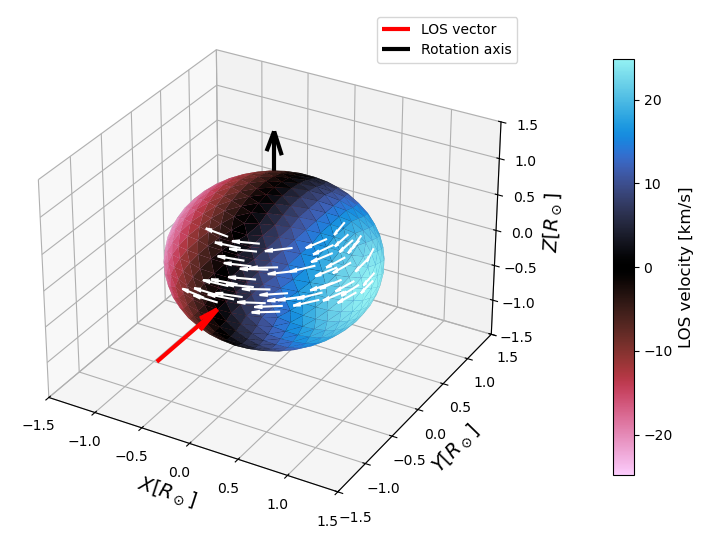

In [3]:
fig, ax = plot_3D(mr, property='los_velocities')
centers_array = np.array(mr.centers)
valid_indices = np.where(
    (centers_array[:,0]>-0.15) &
    (centers_array[:,1]<0.25) &
    (centers_array[:,2] > 0) & 
    (centers_array[:,2]<0.75)
)[0]
indices = valid_indices[::3] #[::][:n_arrows]

centers = np.array(mr.centers)[indices]
velocities = np.array(mr.velocities)[indices]

# Prepare quiver parameters: locations (X,Y,Z) and vectors (U,V,W)
X, Y, Z = centers[:,0], centers[:,1], centers[:,2]
U, V, W = velocities[:,0], velocities[:,1], velocities[:,2]

# Normalize vectors for better visualization (optional)
vec_norm = np.sqrt(U**2 + V**2 + W**2)
U_n, V_n, W_n = U/vec_norm, V/vec_norm, W/vec_norm

# Scale for display (~10% of mean distance from origin)
arrow_scale = 0.25 * np.mean(np.linalg.norm(centers, axis=1))

# Plot quiver arrows on top of existing 3D plot
ax.quiver(X, Y, Z, U_n*arrow_scale, V_n*arrow_scale, W_n*arrow_scale, color='white', length=1.0, normalize=False)

In [4]:
fig.savefig('velocity_vectors_plot.png', dpi=300, bbox_inches='tight')